# 7 機械学習の前処理を行う 10本

## 7.1 機械学習で予測するデータを設定

In [1]:
import seaborn as sns
dataset = sns.load_dataset('titanic')
display(dataset)
label = dataset.pop('survived')
display(label)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

## 7.2 Train/Test データの分割

Train/Testデータを分けることで、modelsの精度を確認することができる。
Training Dataで精度を確認してしまうと、Training Dataに対して過学習しているかなどを確認することができない。そこでテスト用のデータを用意することでより正確に精度の検証を実行することが可能

- テストデータを分割する方法
  - 2分割 (Train/Test)
  - 3分割 (Train/Test/Validation)
  - 5分割

などの手法が存在する

In [2]:
from sklearn.model_selection import train_test_split
# 分割比率: default= 7:3 (test_size=0.2などと指定することで比率を変更することが可能)
# stratify: 均等に分割したいデータを指定している
train_ds, test_ds, train_label, test_label = train_test_split(dataset, label, test_size=0.2, random_state=0, stratify=label)
print(train_ds.shape)
print(test_ds.shape)

(712, 14)
(179, 14)


## 7.3 データを機械学習に適した形式へ変換

- 機械学習に使用すべきでない変数
  - 目的変数と直接的に関係のあるデータ
    - 目的変数と直接的に関係のあるデータは必ず除去すること 
    - **e.g.: alive column** これは現在生きているかどうかという情報であるため、生還したかどうかが前提になっている
  - 長さ(cm)、長さ(m)のように説明変数でほぼ同じデータである変数
    - 未知のデータを予測する際に知り得ない情報や直接的に関係のある情報は使用できない(データリーク)
    - **e.g.: embark_town column** embarkedと同じ事柄を表すデータなので使用しないこと

In [3]:
train_ds.drop(columns=['alive', 'embark_town'])
train_ds.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
502,3,female,NaN,0,0,7.6292,Q,Third,woman,False,NaN,Queenstown,no,True
464,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
198,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
765,1,female,51.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
421,3,male,21.0,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True


機械学習においては、通常は文字列をそのまま扱うことはできず、

変数として使用したい場合は何からの方法で数値データに変換する必要がある。

encode categorical data by one-hot

`pd.get_dummies`により、文字列データを横に変換することが可能

1columnのみ1(=true)となり、それぞれの行の特徴を表す

In [4]:
import pandas as pd
one_hot_encoded = pd.get_dummies(train_ds)
one_hot_encoded.head(5)

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
502,3,NaN,0,0,7.6292,False,True,1,0,0,...,0,0,0,0,0,0,1,0,1,0
464,3,NaN,0,0,8.0500,True,True,0,1,0,...,0,0,0,0,0,0,0,1,1,0
198,3,NaN,0,0,7.7500,False,True,1,0,0,...,0,0,0,0,0,0,1,0,0,1
765,1,51.0,1,0,77.9583,False,False,1,0,0,...,0,1,0,0,0,0,0,1,0,1
421,3,21.0,0,0,7.7333,True,True,0,1,0,...,0,0,0,0,0,0,1,0,1,0


encode categorical data by label encoding

LabelEncoderを宣言した後、fit_transformを用いてclass列を作成している。もともと文字列だった情報が数値データに置き換わることで、順番や大小関係の情報が付加されてしまう。また欠損値もその他の文字列と同様に扱われているが、one-hotエンコーディングでは欠損があってもなくても影響は変わらない

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoded = train_ds.copy()
class_encoder = LabelEncoder()
label_encoded['class'] = class_encoder.fit_transform(label_encoded['class'])
label_encoded.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
502,3,female,NaN,0,0,7.6292,Q,2,woman,False,NaN,Queenstown,no,True
464,3,male,NaN,0,0,8.0500,S,2,man,True,NaN,Southampton,no,True
198,3,female,NaN,0,0,7.7500,Q,2,woman,False,NaN,Queenstown,yes,True
765,1,female,51.0,1,0,77.9583,S,0,woman,False,D,Southampton,yes,False
421,3,male,21.0,0,0,7.7333,Q,2,man,True,NaN,Queenstown,no,True


In [6]:
one_hot_encoded = pd.get_dummies(one_hot_encoded, columns=['pclass'])
one_hot_encoded.head(5)

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,pclass_1,pclass_2,pclass_3
502,NaN,0,0,7.6292,False,True,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
464,NaN,0,0,8.0500,True,True,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
198,NaN,0,0,7.7500,False,True,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
765,51.0,1,0,77.9583,False,False,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
421,21.0,0,0,7.7333,True,True,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [7]:
one_hot_encoded = one_hot_encoded.replace({True: 1, False: 0})
one_hot_encoded.head(5)

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,pclass_1,pclass_2,pclass_3
502,NaN,0,0,7.6292,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
464,NaN,0,0,8.0500,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
198,NaN,0,0,7.7500,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
765,51.0,1,0,77.9583,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
421,21.0,0,0,7.7333,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [8]:
train_ds = one_hot_encoded
train_ds.head(5)

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,pclass_1,pclass_2,pclass_3
502,NaN,0,0,7.6292,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
464,NaN,0,0,8.0500,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
198,NaN,0,0,7.7500,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
765,51.0,1,0,77.9583,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
421,21.0,0,0,7.7333,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1


## 7.4 外れ値の検出

統計的に標準のサンプルとは大きくかけ離れている値を外れ値と呼ぶ。機械学習モデルでは、データの分布によりますが、外れ値があるとそれが原因となり、精度が出ないケースがある。そのため、外れ値に統計的な手法を用いて解析する

- IQR
  - 箱ひげ図を描いたときに下から1/4番目(1/4quantile)のサンプル値を3/4のサンプル値(3/4quantile)という
  - 下限を1/4quantileより`1.5IQR`小さい値、上限を3/4quantileより`1.5IQR`大きい値としたとき、この下限から上限に収まっていない値を外れ値と呼ぶ

- 正規化による検出
- クラスタリングによる検出
- ...etc

In [9]:
q = train_ds.quantile([1 / 4, 3 / 4])
q1, q3 = q.loc[1 / 4], q.loc[3 / 4]
iqr = q3 - q1

mx = q3 + 1.5 * iqr
mn = q3 - 1.5 * iqr

print('#####################################################')
display(mx)
print('#####################################################')
display(mn)
print('#####################################################')

#####################################################


age                        65.0000
sibsp                       2.5000
parch                       0.0000
fare                       64.3625
adult_male                  2.5000
alone                       2.5000
sex_female                  2.5000
sex_male                    2.5000
embarked_C                  0.0000
embarked_Q                  0.0000
embarked_S                  2.5000
class_First                 0.0000
class_Second                0.0000
class_Third                 2.5000
who_child                   0.0000
who_man                     2.5000
who_woman                   2.5000
deck_A                      0.0000
deck_B                      0.0000
deck_C                      0.0000
deck_D                      0.0000
deck_E                      0.0000
deck_F                      0.0000
deck_G                      0.0000
embark_town_Cherbourg       0.0000
embark_town_Queenstown      0.0000
embark_town_Southampton     2.5000
alive_no                    2.5000
alive_yes           

#####################################################


age                        11.0000
sibsp                      -0.5000
parch                       0.0000
fare                       -3.3625
adult_male                 -0.5000
alone                      -0.5000
sex_female                 -0.5000
sex_male                   -0.5000
embarked_C                  0.0000
embarked_Q                  0.0000
embarked_S                 -0.5000
class_First                 0.0000
class_Second                0.0000
class_Third                -0.5000
who_child                   0.0000
who_man                    -0.5000
who_woman                  -0.5000
deck_A                      0.0000
deck_B                      0.0000
deck_C                      0.0000
deck_D                      0.0000
deck_E                      0.0000
deck_F                      0.0000
deck_G                      0.0000
embark_town_Cherbourg       0.0000
embark_town_Queenstown      0.0000
embark_town_Southampton    -0.5000
alive_no                   -0.5000
alive_yes           

#####################################################


In [10]:
# display((train_ds > mx))
# display((train_ds < mn))
# display((train_ds > mx) | (train_ds < mn))
display(((train_ds > mx) | (train_ds < mn)).sum())

age                         56
sibsp                       39
parch                      166
fare                        95
adult_male                   0
alone                        0
sex_female                   0
sex_male                     0
embarked_C                 131
embarked_Q                  61
embarked_S                   0
class_First                173
class_Second               150
class_Third                  0
who_child                   67
who_man                      0
who_woman                    0
deck_A                       6
deck_B                      44
deck_C                      46
deck_D                      28
deck_E                      24
deck_F                       8
deck_G                       3
embark_town_Cherbourg      131
embark_town_Queenstown      61
embark_town_Southampton      0
alive_no                     0
alive_yes                    0
pclass_1                   173
pclass_2                   150
pclass_3                     0
dtype: i

## 7.5 データの分布をみてスケーリング手法

スケーリングとは、異なる範囲にあるデータを同じ範囲に統一することを指す。
例えば、変数Aは`1~10`の範囲で、変数Bは`0~10000`の範囲だった場合、変数Bの重要性が高まる。

機械学習において、取り得る範囲が全く異なる複数の特徴をそのままモデルに学習させた場合、大きいスケールに引っ張られてしまい、小さなスケールの特徴が予測結果に寄与しにくい。そのため、大小関係を保持したまま、小さな値へスケールする必要がある

- 一様分布の場合
  - 最小値を0、最大値を1に収める正規化を利用
  - 判定方法: カイ二乗検定
    - p値が有意水準(0.05または0.01)を超えるかどうかで判断
- 正規分布の場合
  - 平均を0、分散を1に収める標準化を利用
  - 判定方法: シャピロ・ウィルク検定
    - p値が有意水準(0.05または0.01)を超えるかどうかで判断
- その他の分布
  - ロバストスケーリング

In [11]:
train_ds.describe()

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,pclass_1,pclass_2,pclass_3
count,566.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.469823,0.515449,0.363764,33.063763,0.598315,0.605337,0.352528,0.647472,0.183989,0.085674,...,0.011236,0.004213,0.183989,0.085674,0.727528,0.616573,0.383427,0.242978,0.210674,0.546348
std,14.399015,1.059303,0.778387,52.799269,0.490584,0.489122,0.478093,0.478093,0.387747,0.280079,...,0.105477,0.064820,0.387747,0.280079,0.445544,0.486563,0.486563,0.429183,0.408074,0.498197
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,14.458300,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,1.000000,0.000000,30.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([583.,  83.,  26.,   1.,  11.,   5.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

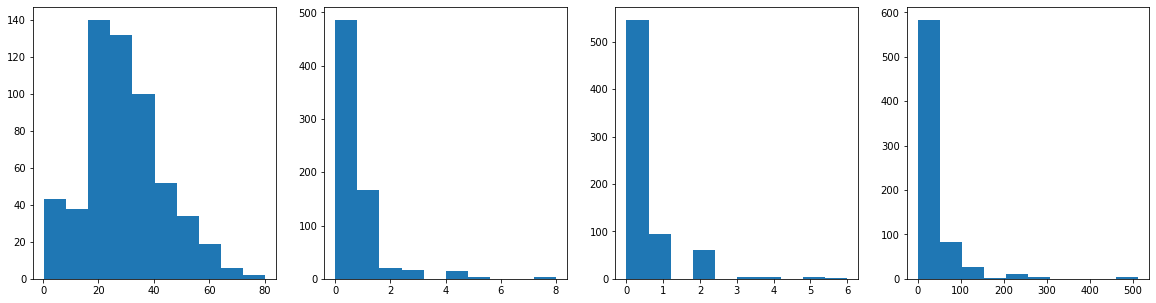

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
axes[0].hist(train_ds.age)
axes[1].hist(train_ds.sibsp)
axes[2].hist(train_ds.parch)
axes[3].hist(train_ds.fare)

### カイ二乗検定/シャピロ・ウィルクス検定


In [13]:
from scipy import stats
import numpy as np
bins, bin_edges = np.histogram(train_ds.age.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f'age: Χ二乗検定のp値: {p}') # p > 0.01ではないため1様分布ではない
stat, p = stats.shapiro(bins)
print(f'age: シャピロ・ウィルクスのp値: {p}') # p > 0.01であるため正規分布に従う

bins, bin_edges = np.histogram(train_ds.sibsp.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f'sibsp: Χ二乗検定のp値: {p}') # p > 0.01ではないため1様分布ではない
stat, p = stats.shapiro(bins)
print(f'sibsp: シャピロ・ウィルクスのp値: {p}') # p > 0.01ではないため正規分布ではない

bins, bin_edges = np.histogram(train_ds.parch.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f'parch: Χ二乗検定のp値: {p}') # p > 0.01ではないため1様分布ではない
stat, p = stats.shapiro(bins)
print(f'parch: シャピロ・ウィルクスのp値: {p}') # p > 0.01ではないため正規分布ではない

bins, bin_edges = np.histogram(train_ds.fare.dropna(), bins='auto')
stat, p = stats.chisquare(bins)
print(f'fare: Χ二乗検定のp値: {p}') # p > 0.01ではないため1様分布ではない
stat, p = stats.shapiro(bins)
print(f'fare: シャピロ・ウィルクスのp値: {p}') # p > 0.01ではないため正規分布ではない


age: Χ二乗検定のp値: 2.0981719225257745e-74
age: シャピロ・ウィルクスのp値: 0.01596013270318508
sibsp: Χ二乗検定のp値: 0.0
sibsp: シャピロ・ウィルクスのp値: 2.3649487316396156e-12
parch: Χ二乗検定のp値: 0.0
parch: シャピロ・ウィルクスのp値: 6.076256227061094e-07
fare: Χ二乗検定のp値: 0.0
fare: シャピロ・ウィルクスのp値: 1.7565288551901513e-20


上記の結果からageは標準化によるスケーリング、その他については、ロバストスケーリングを採用する

## 7.6 分布に従ってスケーリングを採用

スケーリングの目的は変数間の差を減らすことであるため、**本来は全ての変数で同じスケーリングを採用することが多い**

しかし、今回の様に分布が異なる場合、モデルの精度を評価しながらスケーリング手法を変えることが多い。

In [14]:
from sklearn.preprocessing import RobustScaler, StandardScaler

age_scaler = StandardScaler()
sibsp_scaler = RobustScaler()
parch_scaler = RobustScaler()
fare_scaler = RobustScaler()

train_ds['age'] = age_scaler.fit_transform(train_ds['age'].values.reshape(-1, 1))
train_ds['sibsp'] = sibsp_scaler.fit_transform(train_ds['sibsp'].values.reshape(-1, 1))
train_ds['parch'] = parch_scaler.fit_transform(train_ds['parch'].values.reshape(-1, 1))
train_ds['fare'] = fare_scaler.fit_transform(train_ds['fare'].values.reshape(-1, 1))
train_ds

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,pclass_1,pclass_2,pclass_3
502,NaN,0.0,0.0,-0.302507,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
464,NaN,0.0,0.0,-0.283867,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
198,NaN,0.0,0.0,-0.297156,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
765,1.496576,1.0,0.0,2.812846,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
421,-0.588743,0.0,0.0,-0.297896,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.658253,0.0,0.0,-0.328164,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
490,NaN,1.0,0.0,0.244004,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
528,0.662449,0.0,0.0,-0.289404,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
48,NaN,2.0,0.0,0.319863,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1


(array([583.,  83.,  26.,   1.,  11.,   5.,   0.,   0.,   0.,   3.]),
 array([-0.64045626,  1.62899756,  3.89845138,  6.1679052 ,  8.43735903,
        10.70681285, 12.97626667, 15.24572049, 17.51517431, 19.78462813,
        22.05408195]),
 <a list of 10 Patch objects>)

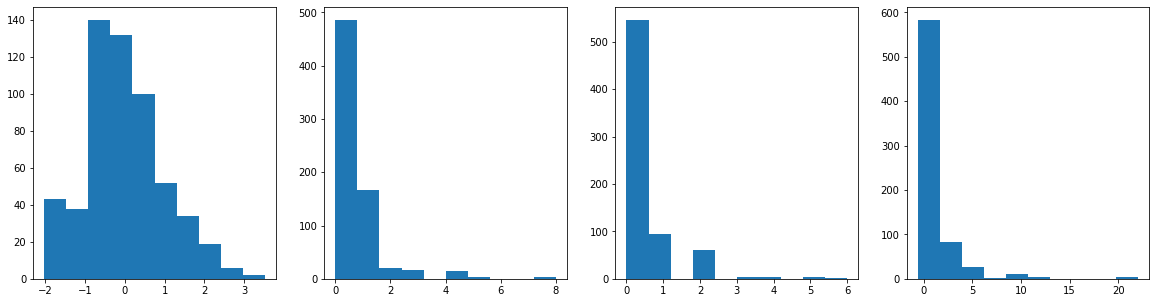

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
axes[0].hist(train_ds.age)
axes[1].hist(train_ds.sibsp)
axes[2].hist(train_ds.parch)
axes[3].hist(train_ds.fare)

## 7.7 スケーラーを保存

Trainデータの正規化を行う際に使用したスケーラーは、Testデータや未知のデータで予測を行う際の前処理にも利用しなければならない。

それができるようにファイルに保存しておく必要がある。今回はpickle形式で保存する。

In [16]:
import os
os.makedirs('data/scalers/', exist_ok=True)
!ls data

scalers


(array([ 43.,  38., 140., 132., 100.,  52.,  34.,  19.,   6.,   2.]),
 array([-2.01927149, -1.46610591, -0.91294032, -0.35977473,  0.19339085,
         0.74655644,  1.29972202,  1.85288761,  2.40605319,  2.95921878,
         3.51238437]),
 <a list of 10 Patch objects>)

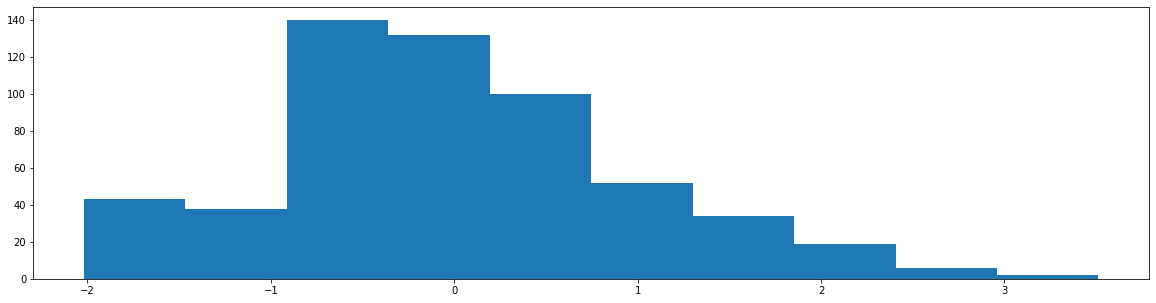

In [19]:
import pickle
with open('data/scalers/age_scaler.pkl', mode='wb') as f:
  pickle.dump(age_scaler, f)
with open('data/scalers/sibsp_scaler.pkl', mode='wb') as f:
  pickle.dump(sibsp_scaler, f)
with open('data/scalers/parch_scaler.pkl', mode='wb') as f:
  pickle.dump(parch_scaler, f)
with open('data/scalers/fare_scaler.pkl', mode='wb') as f:
  pickle.dump(fare_scaler, f)


with open('data/scalers/age_scaler.pkl', mode='rb') as f:
  age_scaler = pickle.load(f)

age_scaled = test_ds.copy()
age_scaled['age'] = age_scaler.fit_transform(age_scaled['age'].values.reshape(-1, 1))

fig, ax= plt.subplots(ncols=1, figsize=(20, 5))
ax.hist(train_ds.age)


## 7.8 欠損値の処理

欠損値が生じる原因は外れ値が生じる原因と似ていて、人的ミスやセンサーのエラーなど様々ある。しかし、外れ値と異なり欠損値をそのままにすると学習の際にエラーとなり学習ができなくなってしまう。

### 欠損値の処理は大きく2つある

- データを除去する方法
- データを補完する方法
  - 中央値/平均値/最頻値などの統計量で補完する場合
  - 0などの決められた値で補完する場合
  - 時系列データのケース
    - 前後関係のデータから線形補完等を利用することがある

比較的統計量を利用した補完が多い

今回は中央値で補完

In [20]:
train_ds.isna().sum()

age                        146
sibsp                        0
parch                        0
fare                         0
adult_male                   0
alone                        0
sex_female                   0
sex_male                     0
embarked_C                   0
embarked_Q                   0
embarked_S                   0
class_First                  0
class_Second                 0
class_Third                  0
who_child                    0
who_man                      0
who_woman                    0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
embark_town_Cherbourg        0
embark_town_Queenstown       0
embark_town_Southampton      0
alive_no                     0
alive_yes                    0
pclass_1                     0
pclass_2                     0
pclass_3                     0
dtype: i

In [23]:
from sklearn.impute import SimpleImputer

# simpleimputerを利用しなくてもpandasなどで補完することも可能
age_imputer = SimpleImputer(strategy='median')
train_ds['age'] = age_imputer.fit_transform(train_ds['age'].values.reshape(-1, 1))
train_ds

,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,...,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,pclass_1,pclass_2,pclass_3
502,-0.102168,0.0,0.0,-0.302507,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
464,-0.102168,0.0,0.0,-0.283867,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
198,-0.102168,0.0,0.0,-0.297156,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
765,1.496576,1.0,0.0,2.812846,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
421,-0.588743,0.0,0.0,-0.297896,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.658253,0.0,0.0,-0.328164,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
490,-0.102168,1.0,0.0,0.244004,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
528,0.662449,0.0,0.0,-0.289404,1,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
48,-0.102168,2.0,0.0,0.319863,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,1


In [24]:
import os
import pickle
os.makedirs('data/imputers/', exist_ok=True)
!ls data
with open('data/imputers/age_imputer.pkl', mode='wb') as f:
  pickle.dump(age_imputer, f)

imputers  scalers
